# Homework solution PyTorch Diabetes

https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

## Loading the dataset

In [ ]:
import torch
torch.__version__

'1.5.0+cu101'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
inputs = diabetes.iloc[:, 0:8].values
inputs.shape

(768, 8)

In [ ]:
inputs

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
inputs

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
outputs = diabetes.iloc[:,8].values
outputs

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.20)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

## Data transformation


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype = torch.float)

In [ ]:
type(X_train)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure

In [ ]:
(8 + 1) / 2

4.5

In [ ]:
# 8 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(8, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 1),
                          nn.Sigmoid())

In [ ]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
loss_function = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

In [ ]:
epochs = 2000
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch   1: loss 0.66394
Epoch   2: loss 0.64807
Epoch   3: loss 0.64290
Epoch   4: loss 0.63505
Epoch   5: loss 0.62313
Epoch   6: loss 0.60549
Epoch   7: loss 0.58290
Epoch   8: loss 0.56031
Epoch   9: loss 0.54233
Epoch  10: loss 0.52902
Epoch  11: loss 0.51870
Epoch  12: loss 0.51023
Epoch  13: loss 0.50305
Epoch  14: loss 0.49684
Epoch  15: loss 0.49144
Epoch  16: loss 0.48672
Epoch  17: loss 0.48261
Epoch  18: loss 0.47905
Epoch  19: loss 0.47596
Epoch  20: loss 0.47328
Epoch  21: loss 0.47091
Epoch  22: loss 0.46880
Epoch  23: loss 0.46689
Epoch  24: loss 0.46514
Epoch  25: loss 0.46354
Epoch  26: loss 0.46205
Epoch  27: loss 0.46068
Epoch  28: loss 0.45941
Epoch  29: loss 0.45824
Epoch  30: loss 0.45717
Epoch  31: loss 0.45618
Epoch  32: loss 0.45528
Epoch  33: loss 0.45446
Epoch  34: loss 0.45372
Epoch  35: loss 0.45305
Epoch  36: loss 0.45245
Epoch  37: loss 0.45190
Epoch  38: loss 0.45141
Epoch  39: loss 0.45097
Epoch  40: loss 0.45057
Epoch  41: loss 0.45021
Epoch  42: loss 

## Evaluate

In [ ]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float)

In [ ]:
predictions = network.forward(X_test)

In [ ]:
predictions

tensor([[3.3385e-01],
        [5.7871e-05],
        [1.7082e-03],
        [9.2858e-02],
        [7.0913e-02],
        [3.1133e-10],
        [7.5009e-02],
        [4.6715e-12],
        [3.1668e-01],
        [1.9531e-02],
        [2.1147e-02],
        [2.7166e-05],
        [6.0122e-02],
        [9.9805e-01],
        [7.4418e-02],
        [1.0000e+00],
        [8.1108e-02],
        [5.5402e-02],
        [4.2759e-02],
        [9.9896e-01],
        [4.4112e-01],
        [3.5185e-12],
        [1.8015e-10],
        [5.3125e-01],
        [1.4124e-02],
        [1.1748e-01],
        [3.5952e-01],
        [1.0000e+00],
        [3.9829e-10],
        [8.5593e-02],
        [9.5009e-02],
        [1.2685e-05],
        [4.4221e-01],
        [4.9865e-07],
        [4.9165e-01],
        [4.9207e-01],
        [3.5116e-03],
        [3.8976e-01],
        [1.0000e+00],
        [7.8162e-02],
        [4.9718e-01],
        [5.3923e-01],
        [4.8077e-01],
        [9.9438e-01],
        [3.0056e-02],
        [4

In [ ]:
predictions = (predictions >= 0.5)
predictions

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_test, predictions.detach().numpy())

0.7337662337662337

In [ ]:
cm = confusion_matrix(y_test, predictions.detach().numpy())
cm

array([[92,  8],
       [33, 21]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


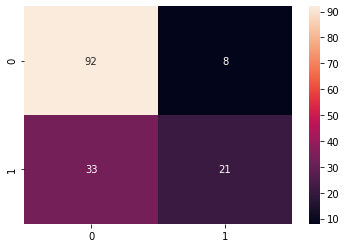

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)